Basic Statistical Description:
         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000
Specified columns not found in the DataFrame.


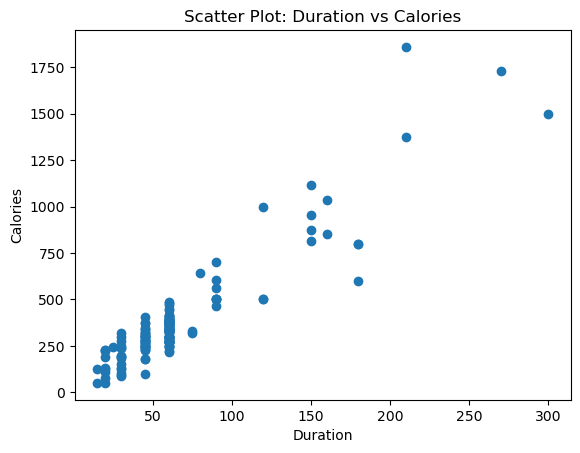

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\sanga\Downloads\Assignment-4 Neural\data.csv'
df = pd.read_csv(file_path)

print("Basic Statistical Description:")
print(df.describe())

if df.isnull().any().any():
    df = df.fillna(df.mean())

columns_to_aggregate = ['Actual_Column1', 'Actual_Column2']

if all(col in df.columns for col in columns_to_aggregate):
    aggregated_data = df[columns_to_aggregate].agg(['min', 'max', 'count', 'mean'])
    print("\nAggregated Data:")
    print(aggregated_data)
else:
    print("Specified columns not found in the DataFrame.")

filtered_df_calories = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

filtered_df_cal_pulse = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]

df_modified = df.drop('Maxpulse', axis=1)

df.drop('Maxpulse', axis=1, inplace=True)

df['Calories'] = df['Calories'].astype(int)

plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Scatter Plot: Duration vs Calories')
plt.show()

Dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

Mean Squared Error (Train): 29793161.08242297
Mean Squared Error (Test): 35301898.88713492


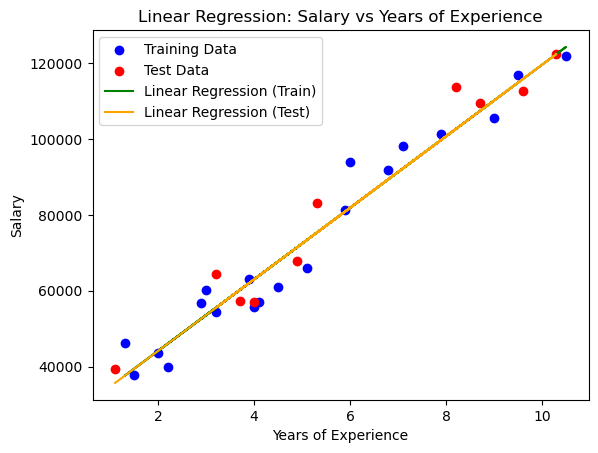

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_path = r'C:\Users\sanga\Downloads\Assignment-4 Neural\Salary_Data (2).csv'  
data = pd.read_csv(file_path)

print("Dataset:")
print(data.head())

X = data[['YearsExperience']]
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("\nMean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_train, y_train_pred, color='green', label='Linear Regression (Train)')
plt.plot(X_test, y_test_pred, color='orange', label='Linear Regression (Test)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')
plt.legend()
plt.show()